In [0]:
from math import cos, pi
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import random

FINAL:
Melhor posição encontrada pelas partículas: [-3.0, 5.0, 1.7713274018919057e-18]
Percetual de Proximidade com a solução exata: 100.0 %
FINAL:
Melhor posição encontrada pelas partículas: [-1.94361169457792, 3.5474660800470637, -0.06602426909003592]
Percetual de Proximidade com a solução exata: 91.1968 %
FINAL:
Melhor posição encontrada pelas partículas: [-3.0, 5.0, 2.409597550301851e-17]
Percetual de Proximidade com a solução exata: 100.0 %
FINAL:
Melhor posição encontrada pelas partículas: [-3.0, 5.0, -1.2953329124971804e-17]
Percetual de Proximidade com a solução exata: 100.0 %
FINAL:
Melhor posição encontrada pelas partículas: [-3.0, 5.0, 1.5046224434493228e-17]
Percetual de Proximidade com a solução exata: 100.0 %


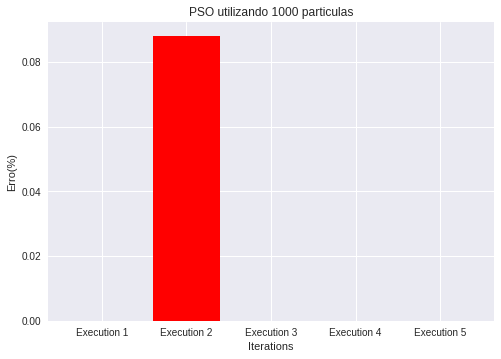

In [5]:
#------------------------------------------------------------------------------+
#   Nathan A. Rooy
#   Simple Particle Swarm Optimization (PSO) with Python
#   July, 2016
#------------------------------------------------------------------------------+


# function we are attempting to optimize (minimize)
def func1(random_variables):
	x1 = random_variables[0]
	x2 = random_variables[1]
	x3 = random_variables[2]
	avg = []
	equation = []
	
	#Forma da equação: ax1 + bx2 + cx3 = b
	equation.append(3*x1 + 2*x2 + 4*x3)
	equation.append(x1 + x2 + 2*x3)
	equation.append(4*x1 + 3*x2 - 2*x3)

	#Calcula a porcentagem de aproximação: (C-Y)/C
	for i in range (3):
		b = i+1
		proximity = (b - equation[i])/b
		avg.append(abs(proximity))

	return np.mean(avg)


class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

            
        #Coloca os erros de execução do PSO numa lista para plotagem final.
        error = 1 - err_best_g
        proximity = err_best_g
        
        # print final results
        print ('FINAL:')
        print ('Melhor posição encontrada pelas partículas:',pos_best_g)
        print ('Percetual de Proximidade com a solução exata:',round(error*100,4),'%')
        
        global particle_results
        
        
        best_particle_results.append(proximity)
        
if __name__ == "__PSO__":
    main()

#--- MAIN ---------------------------------------------------------------------+
N = 5
index = np.arange(N)
height = 0.3
width=0.8
best_particle_results = []

# initial starting location [x1,x2,x3...]
for i in range(5):
    initial = np.random.uniform(-10,10,3)
    
    #input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
    bounds=[(-10,10),(-10,10),(-10,10)]  
    PSO(func1,initial,bounds,num_particles=800,maxiter=1000)

plt.bar(index,best_particle_results,color='red')
plt.title('PSO utilizando 1000 particulas')
plt.xlabel('Iterations')
plt.ylabel('Erro(%)')
plt.xticks(index,('Execution 1','Execution 2','Execution 3','Execution 4','Execution 5'))
plt.show()